<a href="https://colab.research.google.com/github/wilburkwan/edu_datamining/blob/main/Week3_eda_abalone_age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Abalone Age Prediction
Description- Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In this article I have focussed on exploratory data analysis on Abalone Dataset.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 安裝需要的套件
!pip install gspread oauth2client

# 從Google Sheet讀取數據
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from google.colab import auth
import pandas as pd

# 方法一：如果在Colab中運行，可以使用以下身份驗證方式
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# 打開指定的Google Sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1IUrn_O6jrTP6B01A4m5691418Um4wHjeQRr0SgYsYW0/edit?gid=1373824230#gid=1373824230'
sheet_id = sheet_url.split('/')[5]  # 提取sheet_id
worksheet = gc.open_by_key(sheet_id).worksheet('abalone')  # 假設工作表名稱為Sheet1，請根據實際情況調整

# 獲取所有數據並轉換為DataFrame
data = pd.DataFrame(worksheet.get_all_records())

From problem statement and feature discription, let's first compute the target varible of the problem ' Age' and assign it to the dataset.
Age = 1.5+Rings

In [ ]:
 data['age'] = data['Rings']+1.5
 data.drop('Rings', axis = 1, inplace = True)

## Univariate analysis
Understanding feature wise statistics using various inbuilt tools

In [ ]:
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))

This dataset has 4177 observations with 9 features.


In [ ]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Key insights :
            - No missing values in the dataset
            - All numerical features but 'sex'
            - Though features are not normaly distributed, are close to normality
            - None of the features have minimum = 0 except Height (requires re-check)
            - Each feature has difference scale range

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>],
       [<Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

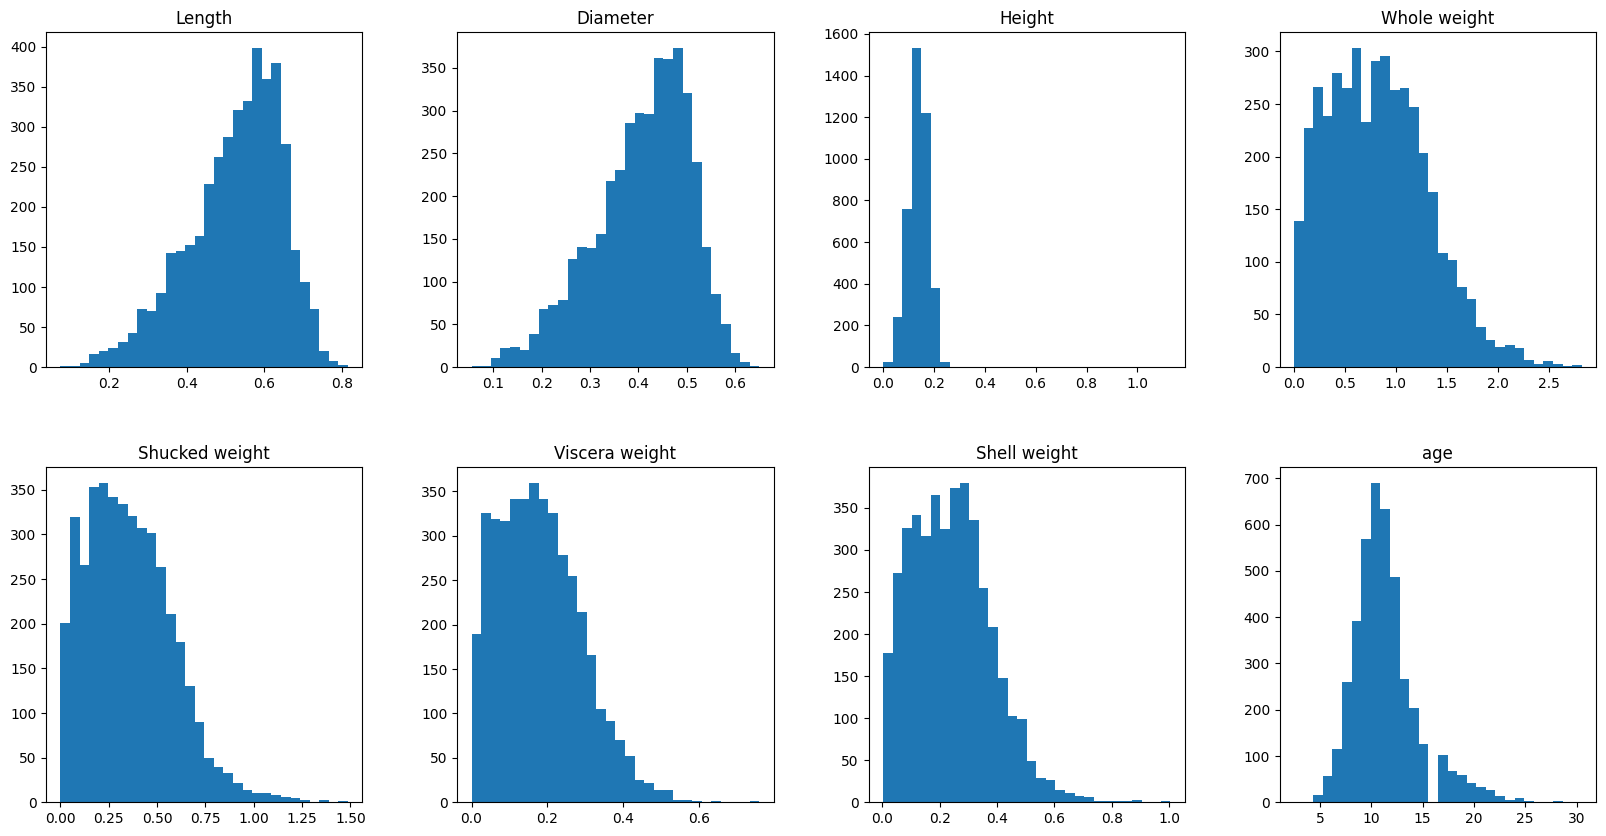

In [ ]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns

In [ ]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [ ]:
categorical_features

Index(['Sex'], dtype='object')

In [ ]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']),
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


對於常態分佈的數據，偏度應該約為 0。從統計角度來說，函數 skewtest 可用來確定偏度值是否足夠接近 0。 - 身高的偏斜度最高，其次是年齡和去殼重量（可以透過直方圖進行交叉驗證）


In [ ]:
# Missing values
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
age,0,0.0


No missing values as said before

<ipython-input-17-207508ecc99a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sex', data = data, palette="Set3")


<Axes: xlabel='Sex', ylabel='count'>

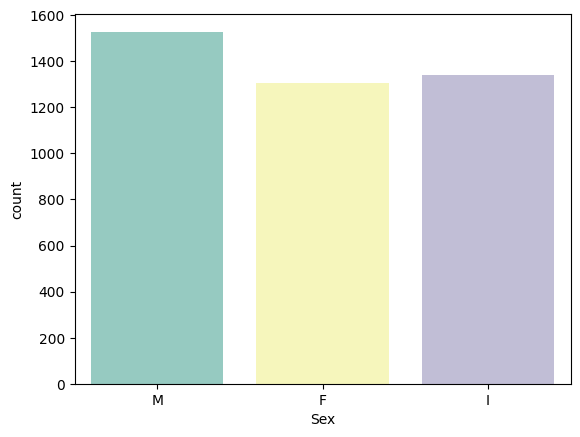

In [ ]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='age'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


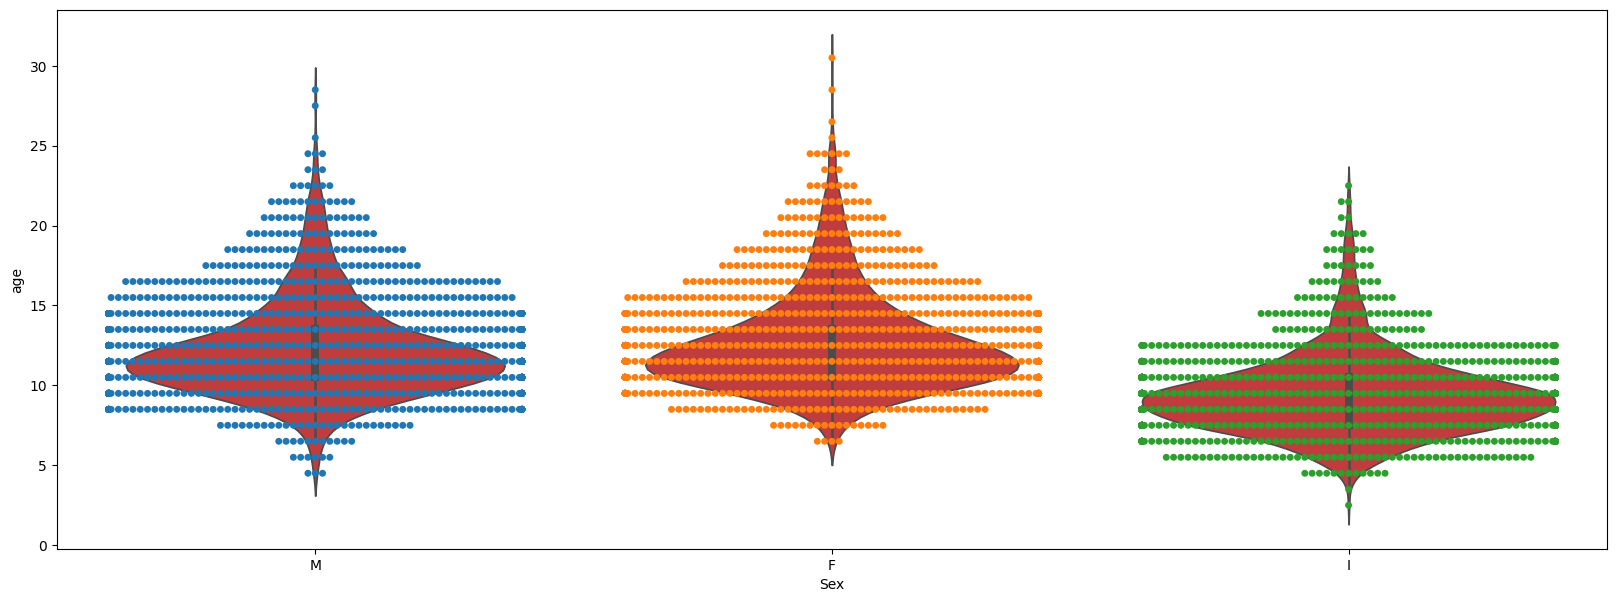

In [ ]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = data)

        Male : age majority lies in between 7.5 years to 19 years
        Female: age majority lies in between 8 years to 19 years
        Immature: age majority lies in between 6 years to < 10 years

In [ ]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


## Bivariate Analysis
雙變量分析 雙變量分析是資料分析過程的重要組成部分，它清楚地描繪了在存在其他特徵的情況下每個特徵如何受到影響。 它還幫助我們理解和識別重要特徵，克服多重共線性效應和相互依賴性，從而提供對隱藏資料雜訊模式的洞察。

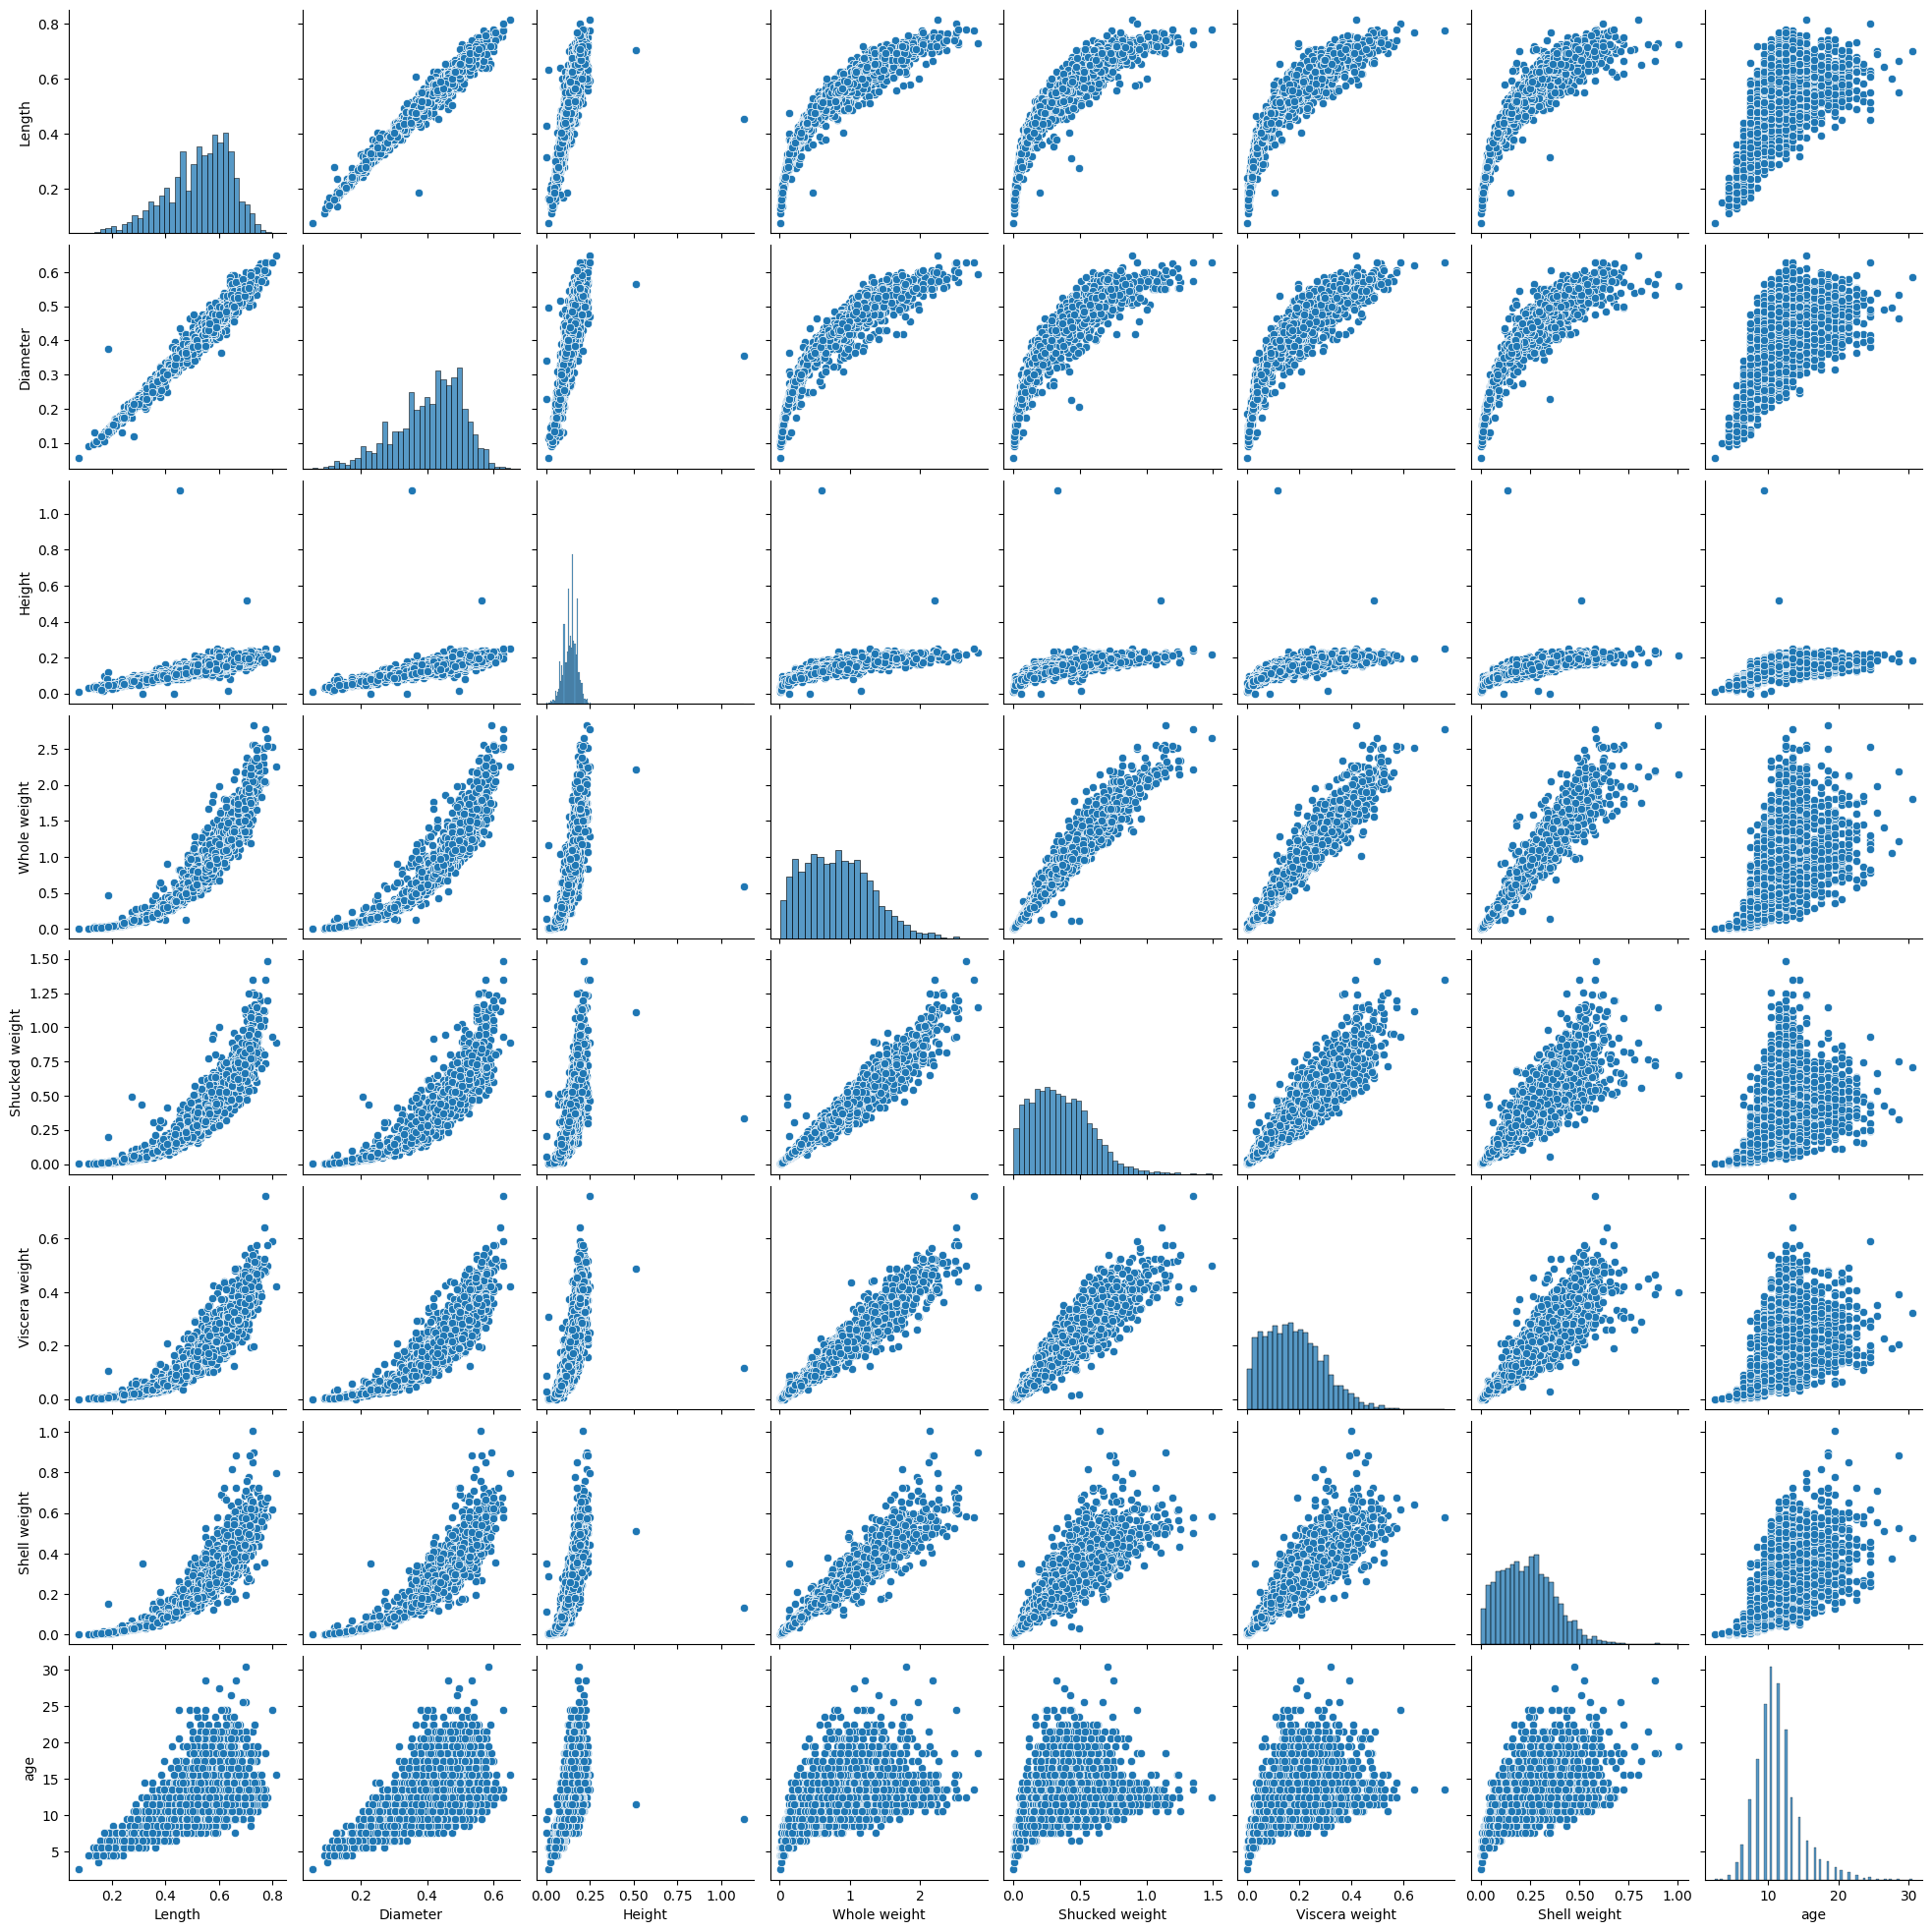

In [ ]:
sns.pairplot(data[numerical_features])

關鍵見解 長度與直徑呈線性相關，而與高度、全重、去殼重、內臟重和殼重呈非線性關係

<Axes: >

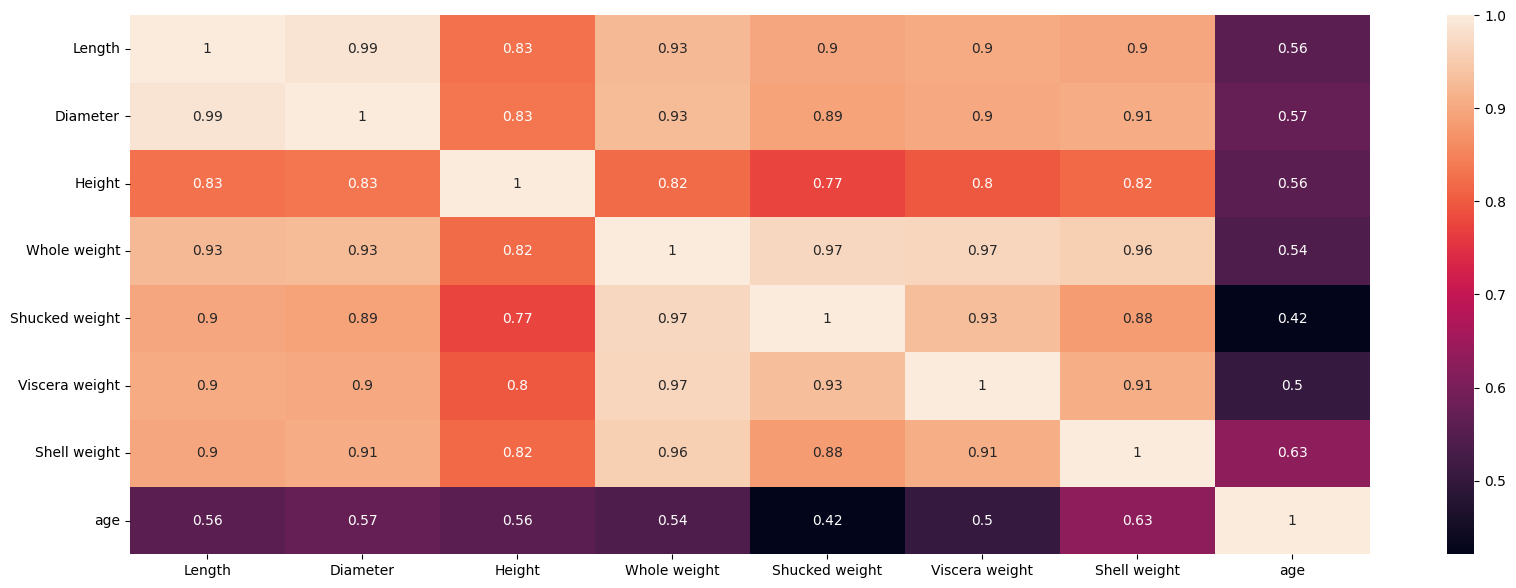

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

整體體重幾乎隨除年齡以外的所有其他特徵呈線性變化     Heigh 與其餘特徵的線性關係最小     年齡與殼重量呈最線性比例，其次是直徑與長度     年齡與去殼重量相關性最小

## Outliers handlings

In [ ]:
data = pd.get_dummies(data)
dummy_data = data.copy()

<Axes: >

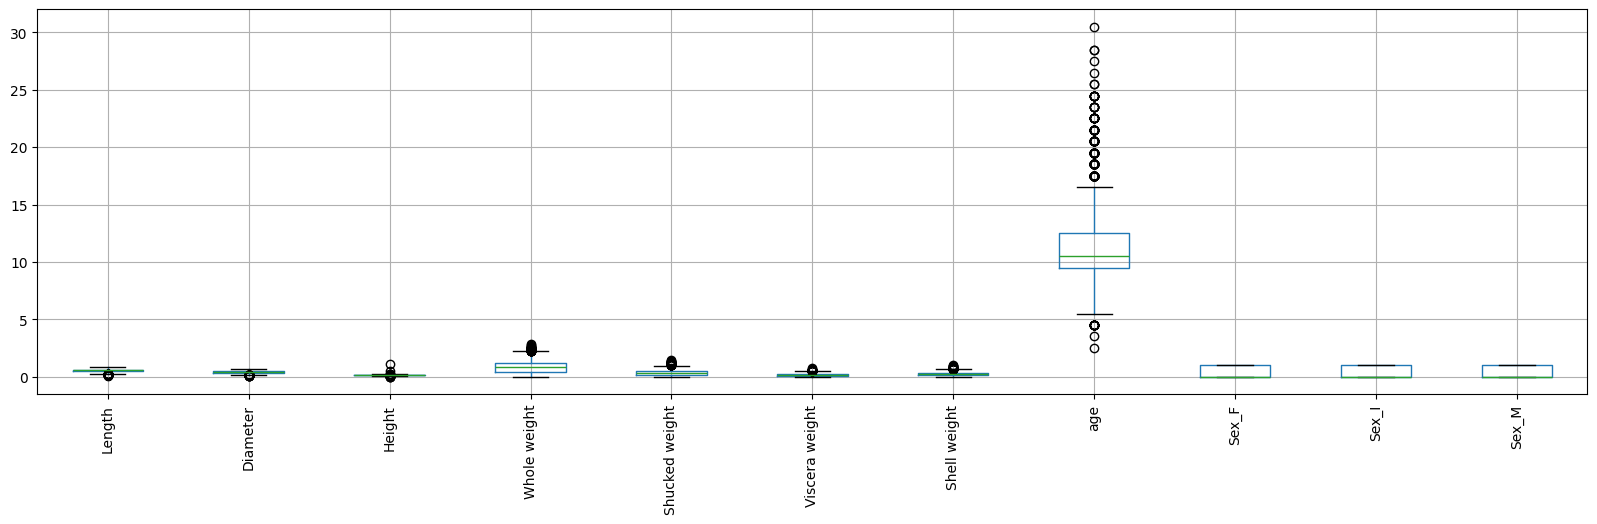

In [ ]:
data.boxplot( rot = 90, figsize=(20,5))

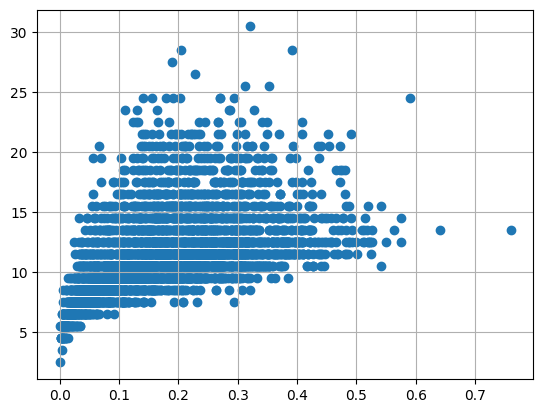

In [ ]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
# outliers removal
data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)

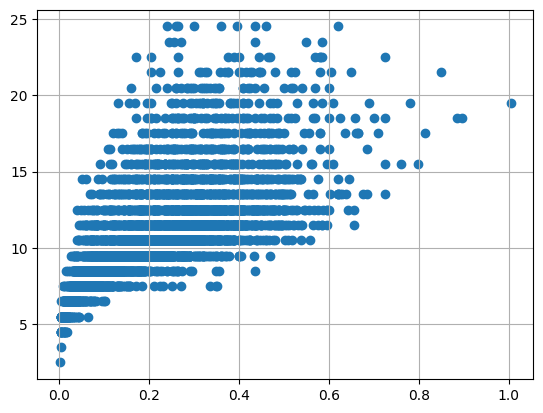

In [ ]:
var = 'Shell weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Shell weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Shell weight']<0.8) & (data['age'] > 25)].index, inplace=True)

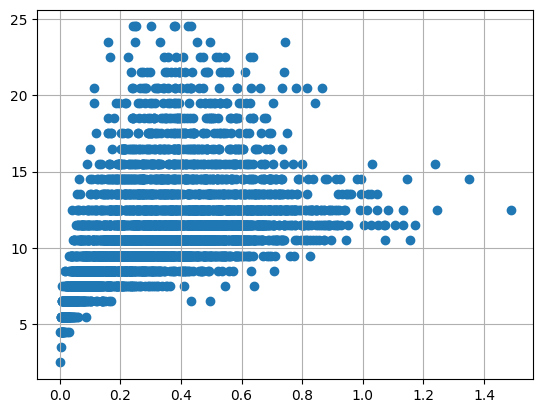

In [ ]:
var = 'Shucked weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Shucked weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked weight']<1) & (data['age'] > 20)].index, inplace=True)

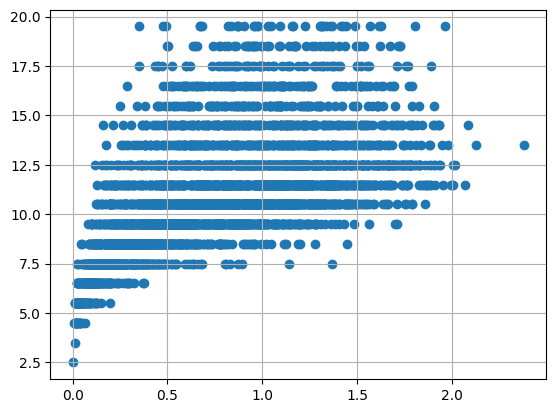

In [ ]:
var = 'Whole weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Whole weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['age'] > 25)].index, inplace=True)

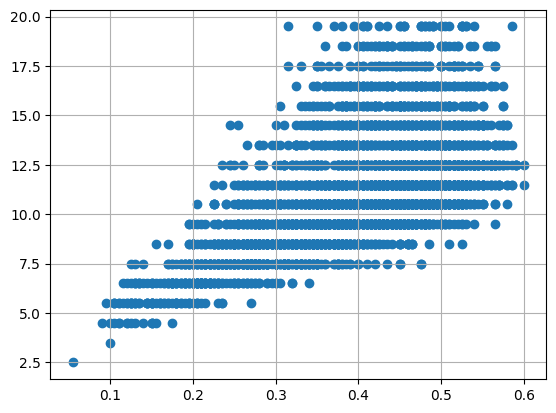

In [ ]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

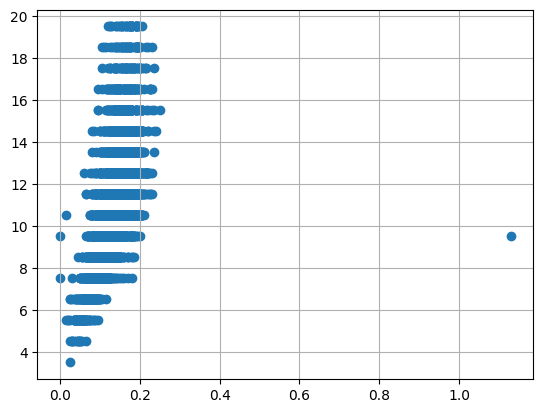

In [ ]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

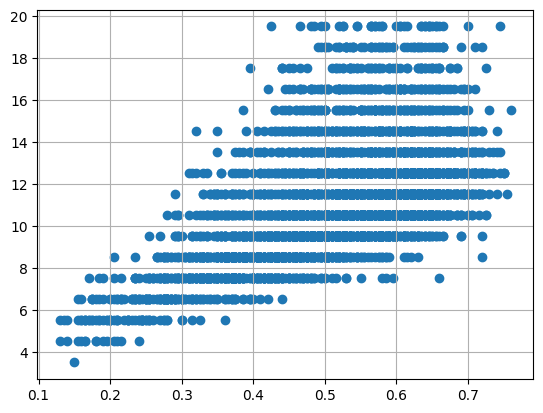

In [ ]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)

## 預處理、建模、評估
任何資料建模管道遵循的基本步驟是： - 預處理 - 選擇合適的模型 - 建模 - 使用 GridSearchCV 調整超參數 - 評估

In [ ]:
X = data.drop('age', axis = 1)
y = data['age']

In [ ]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

In [ ]:
np.random.seed(10)
def rmse_cv(model, X_train, y):
    rmse =- (cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 365.791149, 26.406780
Ridge    : 370.866972, 23.963513
svm    : 392.423980, 23.172935
GNB    : 362.884550, 15.761212
RF    : 349.939081, 19.058974
GB    : 401.703666, 29.141616


您已經看到了上述每個模型的性能。 那麼，您認為我們應該開始或選擇哪種模式？答案就在哲學中的奧卡姆剃刀原理 https://simple.wikipedia.org/wiki/Occam%27s_razor。”假設某件事有兩種解釋。在這種情況下，通常簡單的那種更好。換句話說，你做的假設越多，解釋就越不可能。”因此，從最簡單的 Ridge 模型開始，原因如下： - 特徵維度較少 - 沒有缺失值 - 分類特徵較少

In [ ]:

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['age'])

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Perform cross-validation:
    if performCV:
        cv_score = -cross_val_score(alg, dtrain[predictors], dtrain['age'], cv=cv_folds,
                                                    scoring='r2')

    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % mean_squared_error(dtrain['age'].values, dtrain_predictions))
    print( "R2 Score (Train): %f" % r2_score(dtrain['age'], dtrain_predictions))

    if performCV:
        print( "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),
                                                                                 np.min(cv_score),np.max(cv_score)))

    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.coef_, predictors).sort_values(ascending=False)
        plt.figure(figsize=(20,4))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
RMSE : 3.593
R2 Score (Train): 0.529894
CV Score : Mean - -0.4503433 | Std - 0.08079434 | Min - -0.514565 | Max - -0.3061263


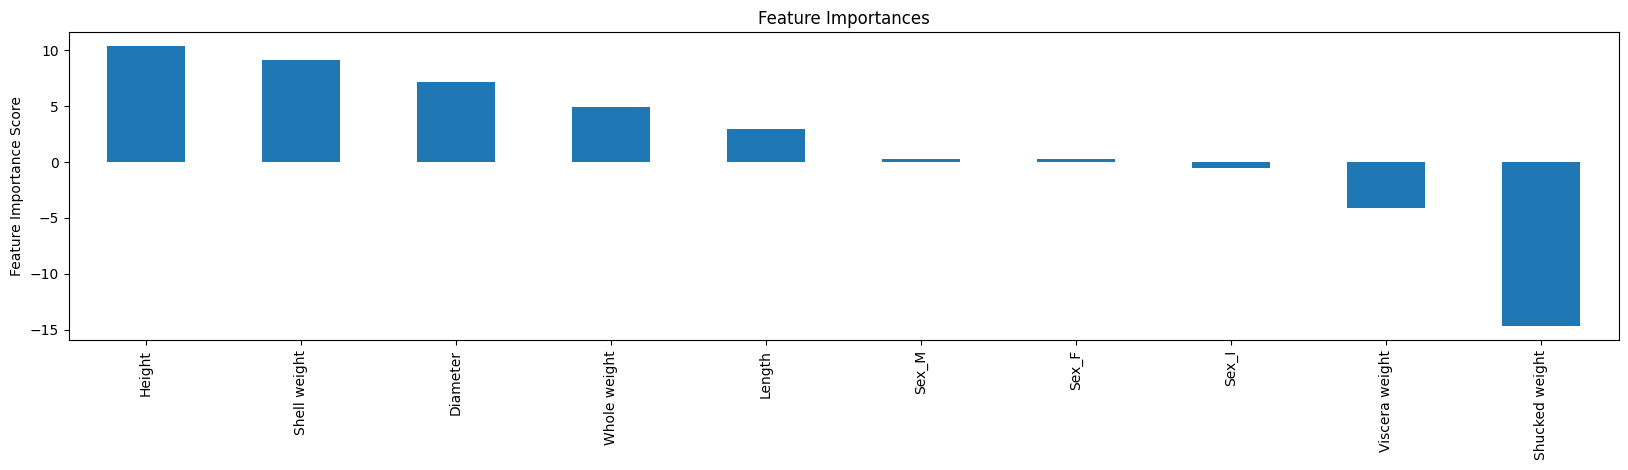

In [ ]:
# Base Model
predictors = [x for x in data.columns if x not in ['age']]
lrm0 = Ridge(random_state=10)
modelfit(lrm0, data, predictors)

## Hyperparameter tunning using GrideSearchCV

In [ ]:
# Let's do hyperparameter tunning using GrideSearchCV
from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm0 = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
glrm0.fit(X_train, y_train)
glrm0.best_params_, glrm0.best_score_

({'alpha': 0.01, 'solver': 'lsqr'}, np.float64(0.5321867203168275))


Model Report
RMSE : 3.558
R2 Score (Train): 0.534426
CV Score : Mean - -0.4543985 | Std - 0.08665801 | Min - -0.5172686 | Max - -0.2913273


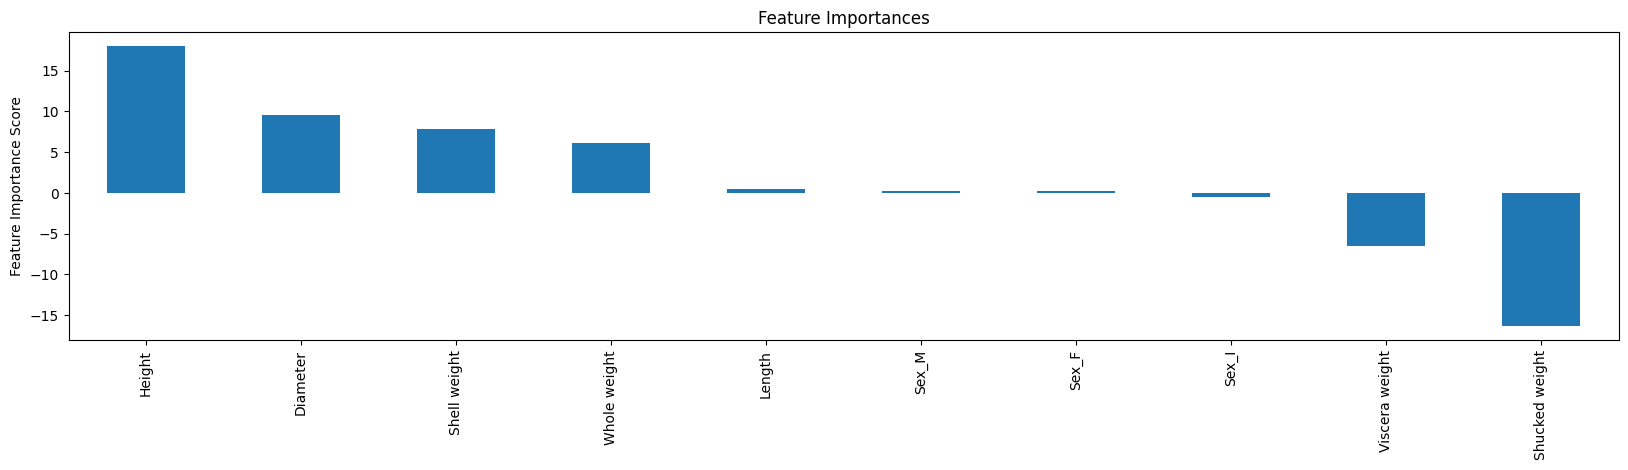

In [ ]:
modelfit(Ridge(alpha = 0.1,random_state=10,), data, predictors)

CV 分數略有提高，而 R2_score 下降，顯示基礎模型過度擬合。 使用上述過程，可以嘗試多種選項來得到更穩健的模型。 該過程也可以在不同的模型上嘗試：RF，GB等。

文 (繁體)
超參數調整是一個迭代過程，並且可以持續進行。由於此核心主要關注鮑魚資料集的 EDA，因此建模建構將被納入另一個核心 [“建模 - 鮑魚年齡預測”]。希望我能透過這個核心幫助您深入了解 Abalone 資料集。

讓我早日想出「建模——鮑魚年齡預測」。 ：）
